
Which function would you like to use?
1: Compare stock performance
2: Create and compare portfolio
3: Exit
Enter the number of your choice: 2
Enter the start year (YYYY): 2000
Enter the end year (YYYY): 2002
Companies available for the selected start year:
Apple
Microsoft
Amazon
How many companies do you want to invest in (max 3)? 1
Enter name for company 1: Apple
Percentage available for allocation: 100%
Enter the portfolio percentage for Apple (0-100%): 100


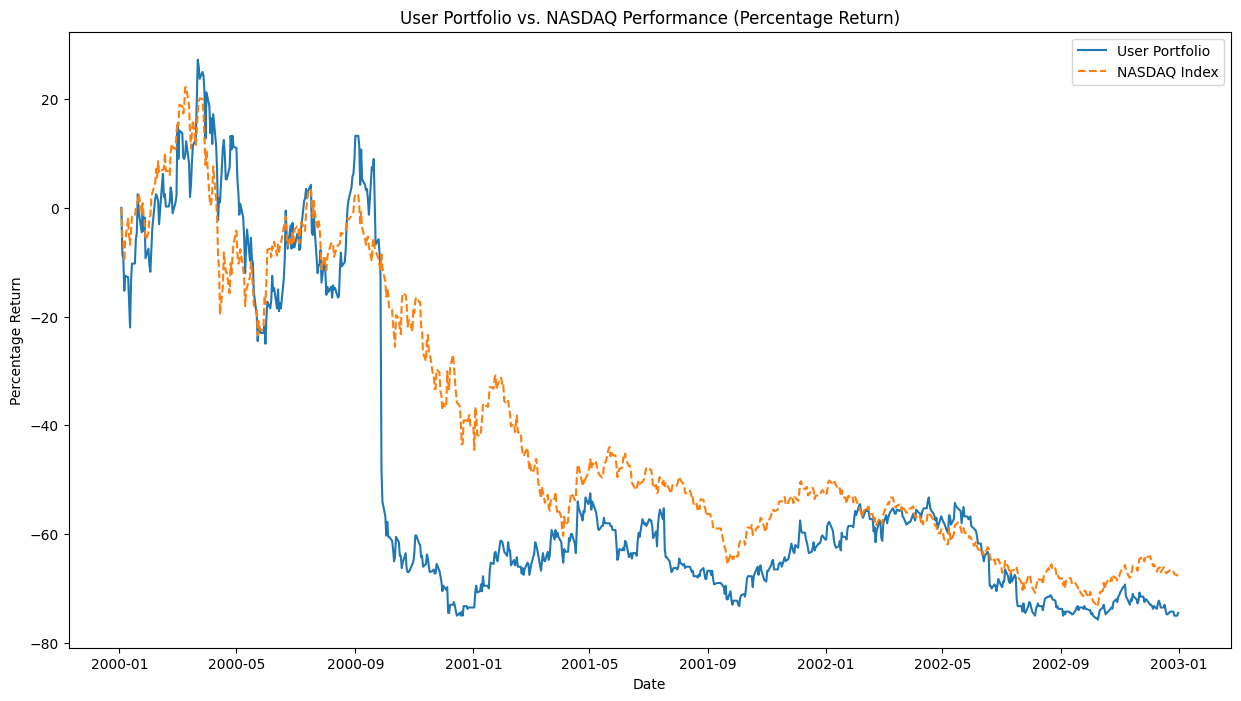


Which function would you like to use?
1: Compare stock performance
2: Create and compare portfolio
3: Exit


KeyboardInterrupt: ignored

In [5]:
# FIRST FUNCTION

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset /// FILE HANDLING
df = pd.read_csv("/content/big_five_stocks.csv")
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

# Mapping of full names to ticker symbols, excluding NASDAQ Index
name_to_ticker = {
    'Apple': 'AAPL',
    'Microsoft': 'MSFT',
    'Amazon': 'AMZN',
    'Google': 'GOOGL',
    'Facebook': 'FB'
}

def plot_stock_performance(data, name_to_ticker):
    # User input for companies to compare
    print("Available companies and their timeframes:")
    for name, ticker in name_to_ticker.items():
        ticker_data = df[df['name'] == ticker]
        start_date = ticker_data['Date'].min().strftime('%Y-%m-%d')
        end_date = ticker_data['Date'].max().strftime('%Y-%m-%d')
        print(f"{name}: from {start_date} to {end_date}")

    num_companies = 0
    while not 1 <= num_companies <= 5:
        try:
            num_companies = int(input("How many companies do you want to compare (1 to 5)? "))
            if not 1 <= num_companies <= 5:
                print("Please enter a number between 1 and 5.")
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 5.")

    # Select companies based on user input
    if num_companies == 5:
        companies = list(name_to_ticker.keys())
    else:
        companies = []
        while len(companies) < num_companies:
            company = input(f"Enter company name {len(companies) + 1}: ")
            if company not in name_to_ticker:
                print("Invalid company name. Please choose from: Apple, Microsoft, Amazon, Google, Facebook.")
            elif company in companies:
                print("This company has already been selected. Please choose a different one.")
            else:
                companies.append(company)

    # User input for start and end year
    start_year = end_year = 0
    while True:
        try:
            start_year = int(input("Enter the start year (YYYY): "))
            if 1971 <= start_year <= 2018:
                break
            else:
                print("Start year must be between 1971 and 2018.")
        except ValueError:
            print("Invalid input. Start year must be a number between 1971 and 2018.")

    while True:
        try:
            end_year = int(input("Enter the end year (YYYY): "))
            if start_year <= end_year <= 2020:
                break
            else:
                print(f"End year must be between the start year ({start_year}) and 2020.")
        except ValueError:
            print(f"Invalid input. End year must be a number between the start year ({start_year}) and 2020.")

    # User input for plot type
    plot_type = ""
    while plot_type not in ['log', 'relative']:
        plot_type = input("Choose plot type ('log' or 'relative'): ")
        if plot_type not in ['log', 'relative']:
            print("Invalid plot type. Please enter 'log' or 'relative'.")

    # User input for including NASDAQ as a benchmark
    include_nasdaq = False
    nasdaq_input = input("Do you want to include NASDAQ as a benchmark? (yes/no): ").lower()
    while nasdaq_input not in ['yes', 'no']:
        print("Invalid input. Please enter 'yes' or 'no'.")
        nasdaq_input = input("Do you want to include NASDAQ as a benchmark? (yes/no): ").lower()
    include_nasdaq = nasdaq_input == 'yes'

    # Data preparation and plotting
    start_date = pd.to_datetime(f'{start_year}-01-01')
    end_date = pd.to_datetime(f'{end_year}-12-31')
    plt.figure(figsize=(15, 8))

    for company in companies:
        ticker = name_to_ticker[company]
        stock_data = data[(data['name'] == ticker) & (data['Date'] >= start_date) & (data['Date'] <= end_date)]

        # Check if the company started trading after the specified start year
        company_first_year = stock_data['Date'].min().year if not stock_data.empty else None
        if company_first_year and company_first_year > start_year:
            print(f"Warning: {company} started trading in {company_first_year}, which is after the specified start year of {start_year}.")

        if not stock_data.empty:
            # Prepare the data for plotting
            if plot_type == 'log':
                plt.plot(stock_data['Date'], np.log(stock_data['close']), label=company)
            elif plot_type == 'relative':
                percentage_change = ((stock_data['close'] - stock_data['close'].iloc[0]) / stock_data['close'].iloc[0]) * 100
                plt.plot(stock_data['Date'], percentage_change, label=company)



    if include_nasdaq:
        nasdaq_data = data[(data['name'] == '^IXIC') & (data['Date'] >= start_date) & (data['Date'] <= end_date)]
        if plot_type == 'log':
            plt.plot(nasdaq_data['Date'], np.log(nasdaq_data['close']), label='NASDAQ Index', linestyle='--')
        elif plot_type == 'relative':
            percentage_change = ((nasdaq_data['close'] - nasdaq_data['close'].iloc[0]) / nasdaq_data['close'].iloc[0]) * 100
            plt.plot(nasdaq_data['Date'], percentage_change, label='NASDAQ Index', linestyle='--')

    plt.title('Stock Performance Comparison')
    plt.xlabel('Date')
    plt.ylabel('Log of Closing Price' if plot_type == 'log' else 'Percentage Change in Closing Price')
    plt.legend()
    plt.show()



## SECOND FUNCTION

def create_and_compare_portfolio(data, name_to_ticker):
    # Ask for start and end year with error handling
    start_year = end_year = 0
    while True:
        try:
            start_year = int(input("Enter the start year (YYYY): "))
            if not 1971 <= start_year <= 2018:
                print("Start year must be between 1971 and 2018.")
            else:
                break
        except ValueError:
            print("Invalid input. Start year must be a number between 1971 and 2018.")

    while True:
        try:
            end_year = int(input("Enter the end year (YYYY): "))
            if not start_year <= end_year <= 2020:
                print(f"End year must be between the start year ({start_year}) and 2020.")
            else:
                break
        except ValueError:
            print(f"Invalid input. End year must be a number between the start year ({start_year}) and 2020.")

    # Convert start_year and end_year to datetime objects
    start_date = pd.to_datetime(f'{start_year}-01-01')
    end_date = pd.to_datetime(f'{end_year}-12-31')

    # Filter the companies that were public by the start_year
    public_companies = {name: ticker for name, ticker in name_to_ticker.items() if data[(data['name'] == ticker) & (data['Date'] <= end_date)]['Date'].min().year <= start_year}

    print("Companies available for the selected start year:")
    available_companies = list(public_companies.keys())
    for company in available_companies:
        print(company)

    # Ask the user for the number of companies they want to invest in
    while True:
        try:
            num_companies = int(input(f"How many companies do you want to invest in (max {len(available_companies)})? "))
            if 1 <= num_companies <= len(available_companies):
                break
            else:
                print(f"Please enter a number between 1 and {len(available_companies)}.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

    portfolio = {}
    total_percentage = 100

    for i in range(1, num_companies + 1):
        while True:
            company = input(f"Enter name for company {i}: ")
            if company not in public_companies:
                print("Invalid company name or company wasn't public in the start year. Please choose from the available companies.")
            elif company in portfolio:
                print("This company has already been selected. Please choose a different one.")
            else:
                while True:
                    print(f"Percentage available for allocation: {total_percentage}%")
                    try:
                        percentage = float(input(f"Enter the portfolio percentage for {company} (0-{total_percentage}%): "))
                        if 0 <= percentage <= total_percentage:
                            total_percentage -= percentage
                            portfolio[company] = percentage
                            break
                        else:
                            print(f"Invalid input. Please enter a number between 0 and {total_percentage}.")
                    except ValueError:
                        print("Invalid input. Please enter a number.")
                break

    if total_percentage != 0:
        print(f"Error: Total portfolio percentage does not sum up to 100%. {total_percentage}% is still unallocated. Please start over.")
        return

    # Compute the cumulative performance of the portfolio
 # Initialize the portfolio performance DataFrame
    date_range = pd.date_range(start_date, end_date, freq='B')  # 'B' for business days
    portfolio_performance = pd.DataFrame(index=date_range)

    # Compute the cumulative return for each company and the entire portfolio
    for company, percentage in portfolio.items():
        ticker = public_companies[company]
        company_data = data[(data['name'] == ticker) & (data['Date'] >= start_date) & (data['Date'] <= end_date)].copy()
        company_data.set_index('Date', inplace=True)
        company_data = company_data.reindex(date_range, method='ffill')  # Forward fill to handle non-trading days
        company_data['cumulative_return'] = company_data['close'].pct_change().fillna(0).add(1).cumprod().sub(1)
        portfolio_performance[company] = company_data['cumulative_return'] * (percentage / 100)

    # Sum the individual cumulative returns to get the portfolio's overall cumulative return
    portfolio_performance['total'] = portfolio_performance.sum(axis=1)

    # Get NASDAQ performance
    nasdaq_data = data[(data['name'] == '^IXIC') & (data['Date'] >= start_date) & (data['Date'] <= end_date)].copy()
    nasdaq_data.set_index('Date', inplace=True)
    nasdaq_data = nasdaq_data.reindex(date_range, method='ffill')  # Forward fill to handle non-trading days
    nasdaq_data['cumulative_return'] = nasdaq_data['close'].pct_change().fillna(0).add(1).cumprod().sub(1)

    # Plot the comparison
    plt.figure(figsize=(15, 8))
    # Convert cumulative returns to percentage by multiplying by 100
    plt.plot(portfolio_performance.index, portfolio_performance['total'] * 100, label='User Portfolio')
    plt.plot(nasdaq_data.index, nasdaq_data['cumulative_return'] * 100, label='NASDAQ Index', linestyle='--')
    plt.title('User Portfolio vs. NASDAQ Performance (Percentage Return)')
    plt.xlabel('Date')
    plt.ylabel('Percentage Return')
    plt.legend()
    plt.show()


## USER INTERFACE

# Function definitions for plot_stock_performance and create_and_compare_portfolio go here
# ...

def main(run_once=False):
    print("\nWhich function would you like to use?")
    print("1: Compare stock performance")
    print("2: Create and compare portfolio")
    print("3: Exit")
    choice = input("Enter the number of your choice: ")

    if choice == '1':
        # Call the function for comparing stock performance
        plot_stock_performance(df, name_to_ticker)
    elif choice == '2':
        # Call the function for creating and comparing a portfolio
        create_and_compare_portfolio(df, name_to_ticker)
    elif choice == '3':
        print("Exiting the program.")
        return
    else:
        print("Invalid choice. Please enter a number from 1 to 3.")

    if not run_once:
        main(run_once=True)

# Initial call to start the program
main()